In [103]:
import random
import math
import networkx as nx
import matplotlib.pyplot as plt

In [104]:
# Class Point
class Point:
    def __init__(self, x, y, color=None):
        self.x = x
        self.y = y
        self.color = color
    
    def __str__(self):
        return "Point: (" + str(self.x) + ", " + str(self.y) + ")" + " | " + str(self.color)

In [118]:
# Class Colored Vertex (3-color graph coloring)
class Vertex(Point):
    def __init__(self, x, y, color=None, vertex_type=None):
        super().__init__(x, y, color)
        self.vertex_type = vertex_type    
    def __str__(self):
        return super().__str__() + " | " + str(self.vertex_type)

In [106]:
# Class for Linked Structure of Vertex implemented as doubly linked list
class LinkedNode:
    def __init__(self, vertex):
        self.data = vertex
        self.prev = None
        self.next = None
        
    def __str__(self):
        return self.data.__str__()

In [107]:
# Class Doubly Linked List - Representation for Convex, Reflex and Ear Nodes of the Polygon
class DoubleLinkedList:
    def __init__(self, cycle=False):
        self.head = None
        self.tail = None
        self.cycle = cycle
        
    def add_node(self, node):
        if self.head == None:
            self.head = node
            self.tail = node
        else:
            # insert at the end
            node.prev = self.tail
            self.tail.next = node
            self.tail = node
        
        # if cyclic    
        if self.cycle:
            self.head.prev = self.tail
            self.tail.next = self.head
            
    def list_nodes(self):
        current = self.head
        while True:
            print(current)
            current = current.next
            if current == self.tail.next:
                break
    
    def __iter__(self):
        current = self.head
        while True:
            yield current
            current = current.next
            if current == self.tail.next:
                break

In [113]:
# Class Polygon
class Polygon:
    def __init__(self, vertices):
        # vertices object is a double linked list structure of Vertex Linked Node
        self.vertices = vertices
        
        # create linked lists for convex, reflex, ear vertices
        self.convex_vertices, self.reflex_vertices = self.get_convex_and_reflex_vertices()
        self.ear_vertices = self.get_ear_vertices()
        
        
    def get_convex_and_reflex_vertices(self):
        convex_vertices = DoubleLinkedList()
        reflex_vertices = DoubleLinkedList()
        for vertex in self.vertices:
            if self.is_convex(vertex.prev, vertex, vertex.next):
                convex_vertices.add_node(vertex)
                vertex.data.vertex_type = "convex"
            else:
                reflex_vertices.add_node(vertex)
                vertex.data.vertex_type = "reflex"
                
        return convex_vertices, reflex_vertices

    
    def get_ear_vertices(self):
        ear_vertices = DoubleLinkedList()
        for vertex in self.vertices:
            if self.is_ear(vertex, vertex.prev, vertex.next):
                ear_vertices.add_node(vertex)
                vertex.data.vertex_type = "ear"
        return ear_vertices
    
    def is_convex(self, vertex1, vertex2, vertex3):
        angle = calculate_angle(vertex1.data, vertex2.data, vertex3.data)
        print(vertex1)
        print(vertex2)
        print(vertex3)
        print(angle)
        return angle <= 180
        
        
    def is_ear(self, vertex, prev_vertex, next_vertex):
        # cannot be ear, if vertex is reflex
        if vertex.data.vertex_type == "reflex":
            return False
        
        triangle = (vertex.data, prev_vertex.data, next_vertex.data)
        for reflex_node in self.reflex_vertices:
            if is_within_triangle(triangle, reflex_node.data):
                return False
        return True
    
    def print_convex_vertices(self):
        self.convex_vertices.list_nodes()
    
    def print_reflex_vertices(self):
        self.reflex_vertices.list_nodes()
        
    def print_ear_vertices(self):
        self.ear_vertices.list_nodes()
        
#     def visualize(self):
        

In [114]:
# Utility Functions
def is_within_triangle(triangle, vertex):
        triangle_area = calculate_area(triangle[0], triangle[1], triangle[2])
        sub_area_1 = calculate_area(triangle[0], triangle[1], vertex)
        sub_area_2 = calculate_area(triangle[0], triangle[2], vertex)
        sub_area_3 = calculate_area(triangle[1], triangle[2], vertex)
        
        if triangle_area == sub_area_1 + sub_area_2 + sub_area_3:
            return True
        
        return False
        
def calculate_area(vertex1, vertex2, vertex3):
    return abs((vertex1.x * (vertex2.y - vertex3.y) + vertex2.x * (vertex3.y - vertex1.y)
                + vertex3.x * (vertex1.y - vertex2.y)) / 2.0)

def calculate_angle(vertex1, vertex2, vertex3):
    angle_1 = math.atan2((vertex3.y-vertex2.y),(vertex3.x-vertex2.x))
    angle_2 = math.atan2((vertex1.y-vertex2.y),(vertex1.x-vertex2.x))
    angle_at_vertex2 = math.degrees(angle_1-angle_2)
    if angle_at_vertex2 == 180:
        return False
    return angle_at_vertex2 + 360 if angle_at_vertex2 < 0 else angle_at_vertex2

In [115]:
# create vertices
vertices = [
    Vertex(0,0),
    Vertex(1,1),
    Vertex(2,4),
    Vertex(2,2),
    Vertex(4,4),
    Vertex(6,0),
    Vertex(8,2),
    Vertex(9,-1),
    Vertex(8,-3),
    Vertex(6,-4),
    Vertex(5,-1),
    Vertex(2,-2)
]

linked_vertices = DoubleLinkedList(cycle=True)

for vertex in vertices:
    linked_vertex = LinkedNode(vertex)
    linked_vertices.add_node(linked_vertex)

linked_vertices.list_nodes()

Point: (0, 0) | None | None
Point: (1, 1) | None | None
Point: (2, 4) | None | None
Point: (2, 2) | None | None
Point: (4, 4) | None | None
Point: (6, 0) | None | None
Point: (8, 2) | None | None
Point: (9, -1) | None | None
Point: (8, -3) | None | None
Point: (6, -4) | None | None
Point: (5, -1) | None | None
Point: (2, -2) | None | None


In [116]:
polygon = Polygon(linked_vertices)

Point: (2, -2) | None | None
Point: (0, 0) | None | None
Point: (1, 1) | None | None
90.0
Point: (0, 0) | None | convex
Point: (1, 1) | None | None
Point: (2, 4) | None | None
206.565051177078
Point: (1, 1) | None | reflex
Point: (2, 4) | None | None
Point: (2, 2) | None | None
18.43494882292202
Point: (2, 4) | None | convex
Point: (2, 2) | None | None
Point: (4, 4) | None | None
315.0
Point: (2, 2) | None | reflex
Point: (4, 4) | None | None
Point: (6, 0) | None | None
71.56505117707799
Point: (4, 4) | None | convex
Point: (6, 0) | None | None
Point: (8, 2) | None | None
288.434948822922
Point: (6, 0) | None | reflex
Point: (8, 2) | None | None
Point: (9, -1) | None | None
63.43494882292201
Point: (8, 2) | None | convex
Point: (9, -1) | None | None
Point: (8, -3) | None | None
135.0
Point: (9, -1) | None | convex
Point: (8, -3) | None | None
Point: (6, -4) | None | None
143.13010235415598
Point: (8, -3) | None | convex
Point: (6, -4) | None | None
Point: (5, -1) | None | None
81.86989

In [117]:
polygon.print_convex_vertices()
print("----------------------")
polygon.print_reflex_vertices()
print("----------------------")
polygon.print_ear_vertices()

Point: (0, 0) | None | convex
Point: (2, 4) | None | convex
Point: (4, 4) | None | ear
Point: (8, 2) | None | ear
Point: (9, -1) | None | ear
Point: (8, -3) | None | ear
Point: (6, -4) | None | ear
Point: (2, -2) | None | ear
----------------------
Point: (1, 1) | None | reflex
Point: (2, 2) | None | reflex
Point: (6, 0) | None | reflex
Point: (5, -1) | None | reflex
----------------------
Point: (4, 4) | None | ear
Point: (8, 2) | None | ear
Point: (9, -1) | None | ear
Point: (8, -3) | None | ear
Point: (6, -4) | None | ear
Point: (2, -2) | None | ear


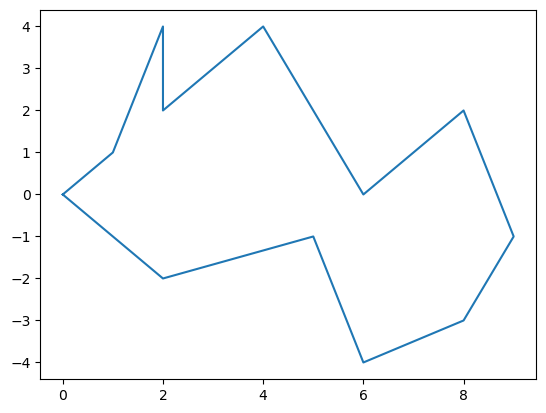

In [96]:
import matplotlib.pyplot as plt
  
# x axis values
x = [1,2,3,4,5,6]
# corresponding y axis values
y = [2,4,1,5,2,6]

# vertex.vertex_type,pos=(vertex.x,vertex.y)
# plotting the points 

# colors = []
coordinates = []
for vertex in vertices:
    coordinates.append([vertex.x,vertex.y])

coordinates.append(coordinates[0]) #repeat the first point to create a 'closed loop'

xs, ys = zip(*coordinates) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.show()

In [119]:
# import networkx as nx
# import numpy as np
# import matplotlib.pyplot as plt

# vertices = [
#     (0,0),
#     (1,1),
#     (2,4),
#     (2,2),
#     (4,4),
#     (6,0),
#     (8,2),
#     (9,-1),
#     (8,-2),
#     (6,-4),
#     (5,-1),
#     (2,-2)
# ]


# G = nx.Graph()
# G.add_edges_from(
#     [[vertices[0],vertices[1]],[vertices[1],vertices[2]],[vertices[2],vertices[3]],[vertices[3],vertices[4]],[vertices[4],vertices[5]],[vertices[5],vertices[6]],[vertices[6],vertices[7]],[vertices[7],vertices[8]],[vertices[8],vertices[9]],[vertices[9],vertices[10]],[vertices[10],vertices[11]],[vertices[11],vertices[0]]])

# # val_map = {'A': 1.0,
# #            'D': 0.5714285714285714,
# #            'H': 0.0}

# # values = [val_map.get(node, 0.25) for node in G.nodes()]

# nx.draw(G, cmap=plt.get_cmap('viridis'), with_labels=True, font_color='white')
# plt.show()

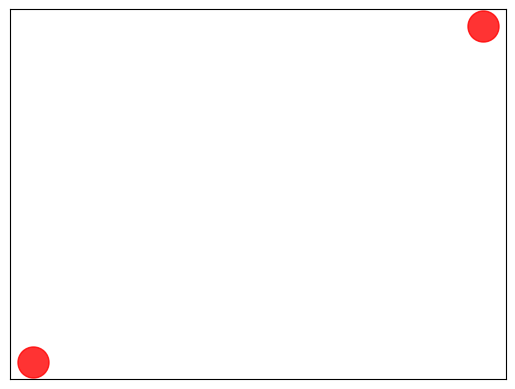

In [87]:
G=nx.Graph()

G.add_node(0,pos=(1,1))

G.add_node(1,pos=(2,2))

G.add_edge(0,1)

pos=nx.get_node_attributes(G,'pos')

# pos
# {1: (1, 1), 2: (2, 2)}

# nx.draw(G,pos,nodelist=[1,2],node_color='r')

nx.draw_networkx_nodes(G,pos,
                       nodelist=[0,1],
                       node_color='r',
                       node_size=500,
                    alpha=0.8)